<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 10px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Arabic Sentiment Classification
</p></b></h1>

<h1 style="color:#800080;">📌 Task Description</h1>

<p>
    The goal of this task is to develop a sentiment classification model for Arabic text.
    Using state-of-the-art natural language processing techniques, we aim to preprocess 
    the data, extract meaningful features using BERT embeddings, and train machine learning 
    models to classify sentiments accurately. This involves dataset preparation, text preprocessing, 
    model training, and performance evaluation to ensure high classification accuracy.
</p>

Steps:

1. Load Data: Load the dataset and preprocess it.

2. Split the Data: Use 70% for training and 30% for testing.

3. BERT Embedding: Convert Arabic text into embeddings using a pre-trained Arabic BERT model.

4. Train Different Models: Train and evaluate:

- RNN
- LSTM
- Bi-Directional RNN
- Bi-Directional LSTM

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Import Libraries
</p></b></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel,TFBertModel,BertTokenizer, BertModel

from tensorflow.keras.layers import Input, Dense, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.models import Model , Sequential

import wandb
wandb.init(mode="disabled")
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Read Data
</p></b></h1>

In [2]:
df=pd.read_csv("/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv")

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Explore & Process Data
</p></b></h1>

In [3]:
df.head()

,label,content
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين ...


In [4]:
df.tail()

,label,content
329995,0,DOA: فتح العلامة التجارية الجديدة من Box.تم تث...
329996,0,شركة صعبة التعامل معها: المنتج كان على ما يرام...
329997,0,SDK Sansa Leather Case: فقير للغاية.لم يتم الإ...
329998,0,حسنًا ، لكن ليس رائعًا: حسنًا ، لقد اشتريت هذا...
329999,1,مريحة جدا!: هذه النعال رائعة!أنها ناعمة جدا وم...


In [5]:
print('Shape of the Data :' ,df.shape)

Shape of the Data : (330000, 2)


In [6]:
print('Data Columns :' ,df.columns )

Data Columns : Index(['label', 'content'], dtype='object')


In [7]:
#check NULL
df.isna().sum()

label      0
content    0
dtype: int64

In [8]:
#check duplicates
print('The Number of duplicates:' ,df.duplicated().sum())

The Number of duplicates: 32


In [9]:
#drop duplicates
df=df.drop_duplicates()

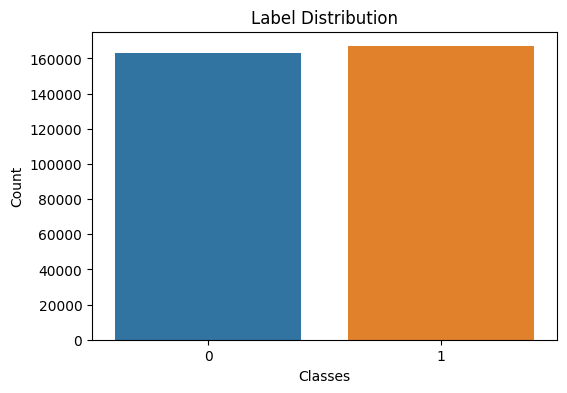

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"])
plt.title("Label Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Split Data
</p></b></h1>

In [11]:
# Split dataset into training (70%) and testing (30%)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['content'].values, df['label'].values, test_size=0.3, random_state=42, stratify=df['label']
)

In [12]:
print(f"Number of train text data:" , len(train_texts))
print(f"Number of test text data:" ,len(test_texts))

Number of train text data: 230977
Number of test text data: 98991


In [13]:
print(f"Type of train text data:" ,train_texts.dtype)
print(f"Type of test text data:" ,test_texts.dtype)

Type of train text data: object
Type of test text data: object


In [14]:
# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


If the output shows a GPU device, TensorFlow will automatically use it for training and inference.


In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [16]:
print(device)

cuda


<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    BERT tokenizer and model
</p></b></h1>

In [17]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('asafaya/bert-base-arabic')
bert_model = BertModel.from_pretrained('asafaya/bert-base-arabic').to(device)

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [18]:
# Tokenize and generate embeddings
def get_bert_embeddings(texts, max_length=128):
    # Tokenize input texts and move them to CUDA
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    
    # Ensure no gradients are computed to save memory
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    # Extract the CLS token embedding and move it to CPU
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

In [19]:
# Convert text data into BERT embeddings
X_train_embed = np.array([get_bert_embeddings(text) for text in train_texts])
X_test_embed = np.array([get_bert_embeddings(text) for text in test_texts])

In [20]:
np.save("X_train_embed.npy", X_train_embed)
np.save("X_test_embed.npy", X_test_embed)

In [21]:
print(f"Number of train text data:" , len(X_train_embed))
print(f"Number of test text data:" ,len(X_test_embed))

Number of train text data: 230977
Number of test text data: 98991


In [23]:
#print all shapes of data
print(f"X_train_embed shape: {X_train_embed.shape}")  
print(f"tarin_labels shape: {train_labels.shape}")  
print(f"X_test_embed shape: {X_test_embed.shape}")  
print(f"test_labels shape: {test_labels.shape}")  

X_train_embed shape: (230977, 1, 768)
tarin_labels shape: (230977,)
X_test_embed shape: (98991, 1, 768)
test_labels shape: (98991,)


In [24]:
def build_and_train_model(model, train_data, train_labels, test_data, test_labels, epochs=10, batch_size=16, model_name='Model'):
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model and capture history
    history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print(f"{model_name} Test Accuracy: {test_accuracy}")
    
    # Plot training and validation accuracy/loss
    plot_training_history(history, model_name)

In [25]:
def plot_training_history(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    RNN Model
</p></b></h1>

Epoch 1/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7981 - loss: 0.4370 - val_accuracy: 0.8277 - val_loss: 0.3871
Epoch 2/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8236 - loss: 0.3933 - val_accuracy: 0.8310 - val_loss: 0.3782
Epoch 3/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8271 - loss: 0.3881 - val_accuracy: 0.8306 - val_loss: 0.3815
Epoch 4/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8300 - loss: 0.3831 - val_accuracy: 0.8351 - val_loss: 0.3701
Epoch 5/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8285 - loss: 0.3837 - val_accuracy: 0.8388 - val_loss: 0.3665
Epoch 6/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8316 - loss: 0.3796 - val_accuracy: 0.8379 - val_loss: 0.3675
Epoch 7/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8302 - loss: 0.3803 - val_accuracy: 0.8386 - val_loss: 0.3648
Epoch 8/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

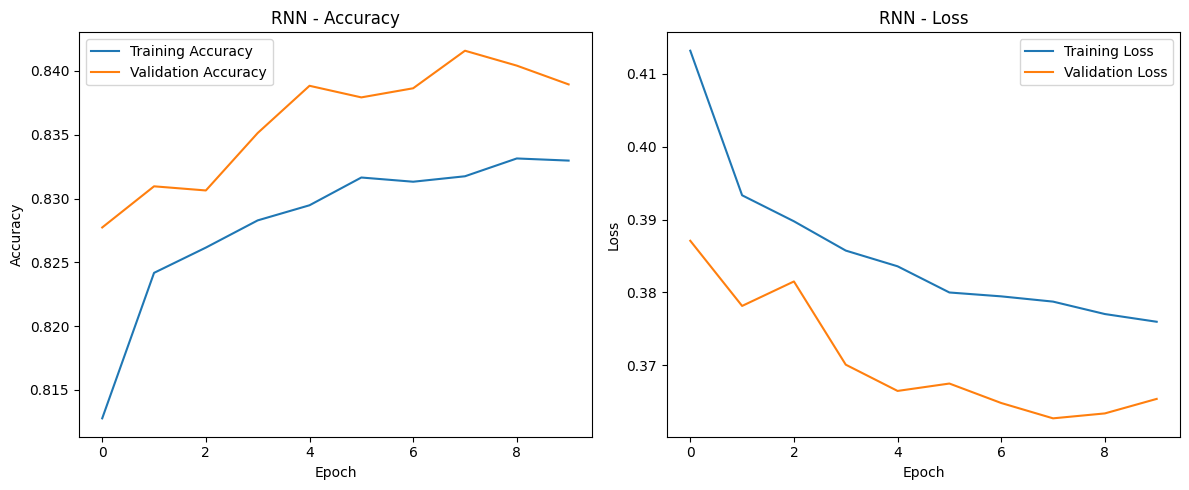

In [26]:
from tensorflow.keras.layers import Dropout

model_rnn = Sequential([
    SimpleRNN(64, input_shape=(X_train_embed.shape[1], X_train_embed.shape[2])),  # Input shape: (timesteps, features)
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

build_and_train_model(model_rnn, X_train_embed, train_labels, X_test_embed, test_labels, model_name='RNN')

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    LSTM Model
</p></b></h1>

Epoch 1/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.7909 - loss: 0.4465 - val_accuracy: 0.8293 - val_loss: 0.3791
Epoch 2/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8212 - loss: 0.3991 - val_accuracy: 0.8300 - val_loss: 0.3763
Epoch 3/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8247 - loss: 0.3904 - val_accuracy: 0.8357 - val_loss: 0.3657
Epoch 4/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8301 - loss: 0.3839 - val_accuracy: 0.8378 - val_loss: 0.3652
Epoch 5/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8309 - loss: 0.3816 - val_accuracy: 0.8393 - val_loss: 0.3607
Epoch 6/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8320 - loss: 0.3770 - val_accuracy: 0.8419 - val_loss: 0.3585
Epoch 7/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8351 - loss: 0.3715 - val_accuracy: 0.8421 - val_loss: 0.3577
Epoch 8/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 

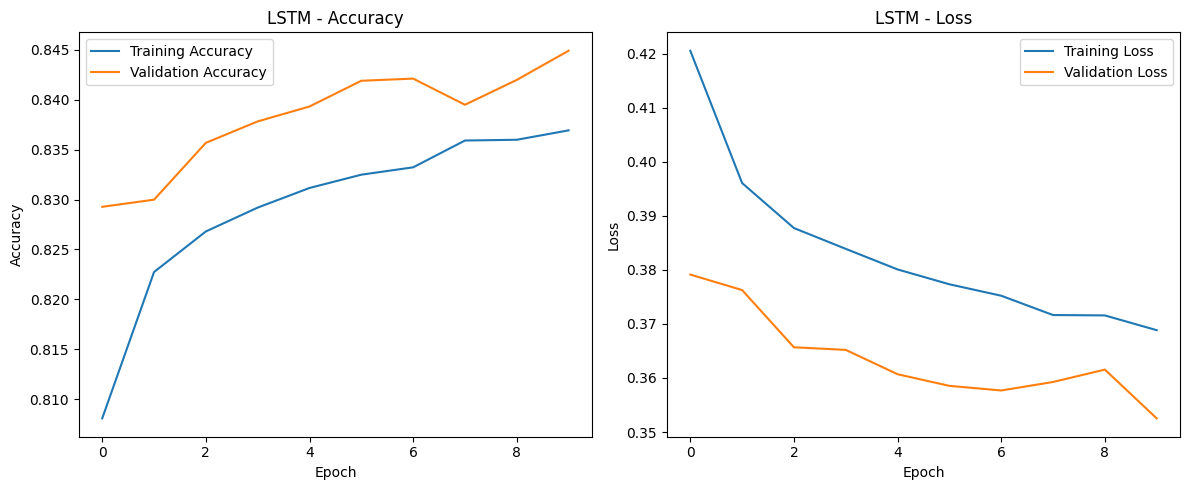

In [27]:
model_lstm = Sequential([
    LSTM(64,  input_shape=(X_train_embed.shape[1], X_train_embed.shape[2])),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
build_and_train_model(model_lstm,X_train_embed, train_labels, X_test_embed, test_labels, model_name='LSTM')

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Bi-RNN Model
</p></b></h1>

Epoch 1/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7885 - loss: 0.4550 - val_accuracy: 0.8262 - val_loss: 0.3889
Epoch 2/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8211 - loss: 0.4030 - val_accuracy: 0.8313 - val_loss: 0.3793
Epoch 3/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8220 - loss: 0.3995 - val_accuracy: 0.8331 - val_loss: 0.3765
Epoch 4/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8253 - loss: 0.3945 - val_accuracy: 0.8351 - val_loss: 0.3758
Epoch 5/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8251 - loss: 0.3942 - val_accuracy: 0.8346 - val_loss: 0.3753
Epoch 6/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8268 - loss: 0.3901 - val_accuracy: 0.8343 - val_loss: 0.3741
Epoch 7/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8238 - loss: 0.3947 - val_accuracy: 0.8344 - val_loss: 0.3758
Epoch 8/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

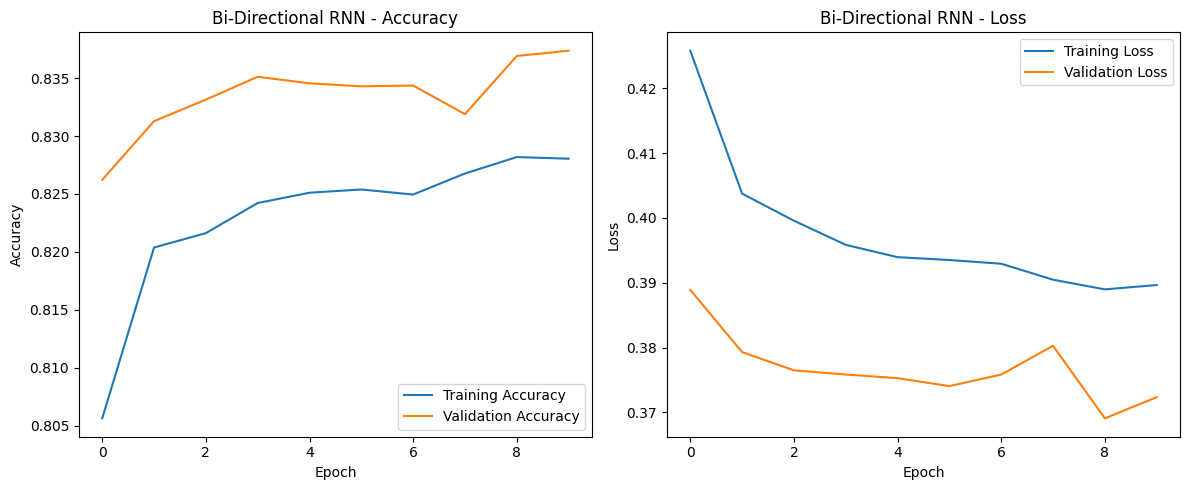

In [28]:
# Bi-Directional RNN
model_birnn = Sequential([
    Bidirectional(SimpleRNN(64), input_shape=(X_train_embed.shape[1], X_train_embed.shape[2])),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
build_and_train_model(model_birnn, X_train_embed, train_labels, X_test_embed, test_labels, model_name='Bi-Directional RNN')

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Bi-LSTM Model
</p></b></h1>

Epoch 1/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.7951 - loss: 0.4407 - val_accuracy: 0.8308 - val_loss: 0.3773
Epoch 2/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8231 - loss: 0.3940 - val_accuracy: 0.8358 - val_loss: 0.3693
Epoch 3/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8291 - loss: 0.3818 - val_accuracy: 0.8377 - val_loss: 0.3638
Epoch 4/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8310 - loss: 0.3797 - val_accuracy: 0.8369 - val_loss: 0.3665
Epoch 5/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8336 - loss: 0.3749 - val_accuracy: 0.8422 - val_loss: 0.3587
Epoch 6/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8352 - loss: 0.3713 - val_accuracy: 0.8392 - val_loss: 0.3624
Epoch 7/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.8370 - loss: 0.3673 - val_accuracy: 0.8411 - val_loss: 0.3563
Epoch 8/10
11549/11549 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 

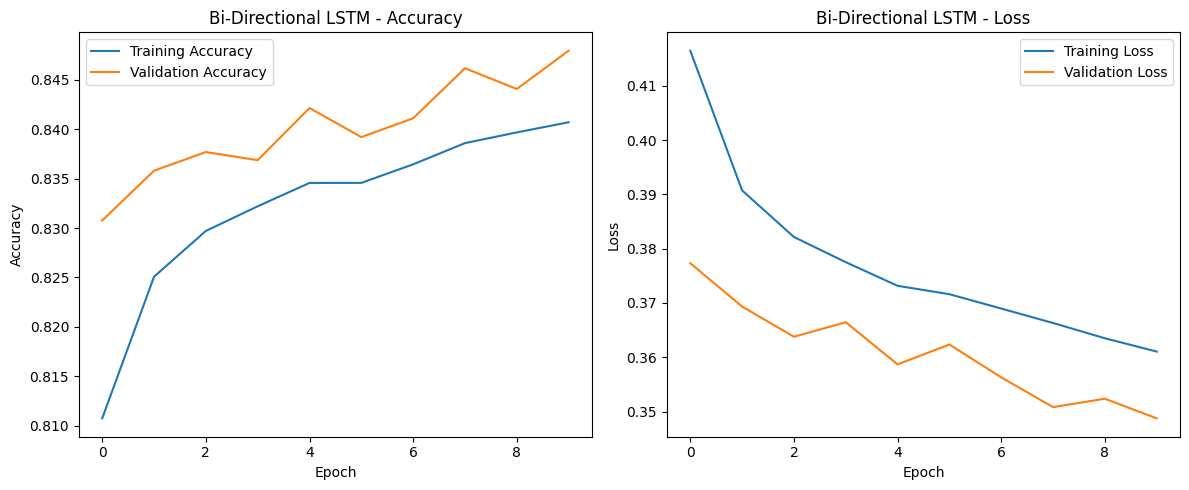

In [29]:
# Bi-Directional LSTM
model_bilstm = Sequential([
    Bidirectional(LSTM(64), input_shape=(X_train_embed.shape[1], X_train_embed.shape[2])),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
build_and_train_model(model_bilstm, X_train_embed, train_labels, X_test_embed, test_labels, model_name='Bi-Directional LSTM')

<a id="1"></a>
<h1><b><p style="
    background-color: #800080;  /* Purple Background */
    font-family: Cambria, Cochin, Georgia, Times, 'Times New Roman', serif;
    font-size: 110%;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 7px;
    border: solid 2px #4B0082;  /* Dark Purple Border */
    box-shadow: 5px 5px 10px #4B0082;">
    Compare All Models
</p></b></h1>

3094/3094 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8418 - loss: 0.3611
3094/3094 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8465 - loss: 0.3472
3094/3094 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8382 - loss: 0.3685
3094/3094 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8495 - loss: 0.3416


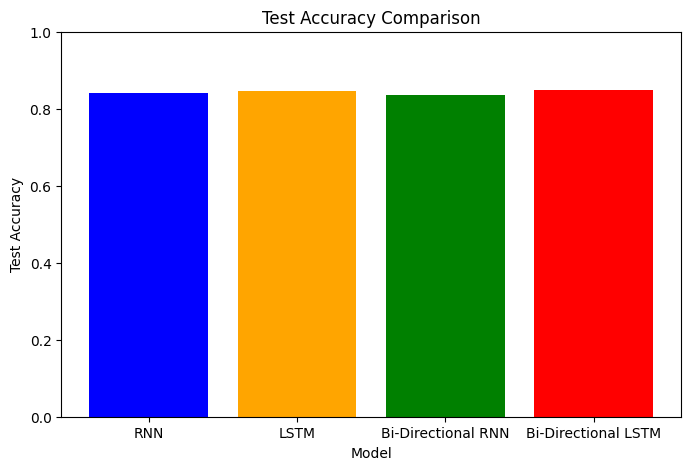

In [30]:
# Test accuracies of all models
models = ['RNN', 'LSTM', 'Bi-Directional RNN', 'Bi-Directional LSTM']
test_accuracies = [model_rnn.evaluate(X_test_embed, test_labels)[1],
                   model_lstm.evaluate(X_test_embed, test_labels)[1],
                   model_birnn.evaluate(X_test_embed, test_labels)[1],
                   model_bilstm.evaluate(X_test_embed, test_labels)[1]]

# Plot test accuracies
plt.figure(figsize=(8, 5))
plt.bar(models, test_accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.show()